In [28]:
#import all this in the python file
import pandas as pd
import os
import sys
import nltk
import tensorflow as tf
import matplotlib

import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy

#tokenise all the words with the help of a tokeniser
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer() #num_words is the tokeniser that fits the number of words

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D #find out how come they using different types of drop outs
from tensorflow.keras.layers import Embedding
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [29]:
#call this function
def predict_sentiment(text):#note that 1 denotes positive and 0 denotes negative
    model = keras.models.load_model('model')
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    if prediction ==1:
        print("Predicted label: Good sentiment")
    else:
        print("Predicted label: Bad sentiment")

In [33]:
predict_sentiment("break")

Predicted label: Bad sentiment


In [2]:
ps = PorterStemmer()

In [37]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True, #restoring the best weights
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,restore_best_weights=True)

In [35]:
chunks = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize = 100)
reviews = pd.concat([c for c in chunks])
df = reviews
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
8635398,PHnqMOU1pzHbnUMk3Cg2zA,6olZ0y9oW9azON61AhwxYg,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,0,0,"In December, I called in (as a returning custo...",2021-01-26 04:07:14
8635399,dViF8gg9745CszpekNvp2g,EPYNZQFuSKqLi-on3U9dFg,RDgwjgbu5xziFIAaNn3WCQ,1,13,1,0,This guy is a moron that will stalk and harass...,2019-05-01 21:21:43
8635400,7vNXRIClt-9rFzMXlrtMXA,tr13Jb83h2itjyXVwaO5eA,rbuj2X4SXIc3MDul4dcxIA,5,39,13,34,"Yummy, great chew on the bagel\nFriendly staff...",2020-06-13 02:39:26
8635401,Ho57jz6U-JjrGHpGWIGLNg,HqdmRMpNvScFxjGAB40vgQ,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,0,0,This used to be my car wash of choice. They di...,2020-06-22 21:54:10


In [38]:
#labelling the positive and negative values
row_indexes_positive=df[df['stars']>=4].index 
df.loc[row_indexes_positive,'sentiment']=1 #can think about whether we should just encode 1 and 0 here
row_indexes_positive=df[df['stars']>=4]

row_indexes_negative=df[df['stars']<4].index 
df.loc[row_indexes_negative,'sentiment']=0
row_indexes_negative=df[df['stars']<4]

In [39]:
sample10000negative = row_indexes_negative.sample(n=10000) #maybe can try bigger numbers later
sample10000positive = row_indexes_positive.sample(n=10000)
review_df = pd.concat([sample10000negative, sample10000positive], axis=0)
review_df = review_df.sample(frac = 1) #shuffling the positive and negative sentiments
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
1284187,jRfSn5UeI2fsNoPhvIP6Lg,A5Bc7xh874u8pcKgAHe2TQ,QSDbe23wibJ_8izWZaTh4A,4,5,3,5,Grilled Cheese Heaven! How can you go wrong? ...,2016-03-14 03:25:39,1.0
6157357,E6xsXRtCoujmbtt1eZ_n0g,zitx8RGIkkwEEw4-pucwTw,xrq2Mne2lv_fQGDC_OZmuw,5,5,0,1,"The salads are pricey, yet amazing! The restau...",2016-05-09 18:10:54,1.0
3385329,3I-tXx8n5yybGgFuMhNYGw,tL2PcTHbHOlkeBiPeKszgQ,85ZhjypQaCGkWURvGOyCfA,2,4,1,0,This place used to be great when it was Wentwo...,2019-02-23 22:22:12,0.0
8352005,p1gvRwEtfgeDchdZ7QonEw,pjFeb3HBLivEG-elLryn4w,RMcxvvVJI_R9lCL95doK2w,3,3,0,1,Mint tea is one of those places that you just ...,2012-04-26 02:57:27,0.0
5773393,h6x-c0yx4GJQRF12Wm_IYQ,s-igAhX3wTgWSlxEJP1WDQ,mkqiEUO9KZbYtFPaDGxT0w,3,0,0,0,Good option for those who are vegetarian...but...,2019-10-16 19:15:26,0.0


In [40]:
review_df = review_df[['text','sentiment']]
review_df.head()
review_df.dropna() #dropping the reviews that do not have a sentiment
review_df.shape

(20000, 2)

In [41]:
#think about whether we want to take the neutral and drop or just dont classify as neutral
valuecount = review_df[['sentiment']].value_counts()
print(valuecount)


sentiment
0.0          10000
1.0          10000
dtype: int64


In [42]:
#convert the categorical data into numeric data
review_df.head()
sentiment_label = review_df["sentiment"].factorize() #0 represents the positive sentiment and 1 represents the negative sentiment
review_df.tail()

,text,sentiment
6355223,Wait time to dine is an hour versus ordering d...,0.0
5619275,The Cajun blackened ahi tuna tacos are amazing...,1.0
8482030,I think (hope) that a lot of the problems we e...,0.0
7029953,Everytime my boyfriend & I come here we get th...,1.0
357035,This place is no longer a coffee shop but more...,0.0


In [48]:
print(string.punctuation)
p = string.punctuation
p=list(p)
type(p)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


list

In [50]:
#retrieve all the data from the dataset
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
meaninglessTokens = ["...","``","\"","--","\'"]

preStem = []

for i in range(len(review_df["text"].values)):
        text = str(review_df['text'].iloc[i]).lower()
        word = word_tokenize(text)
        if word not in p:
            if word not in sw:
                if word not in meaninglessTokens: 
                    preStem.extend(word)
vocab_size = len(preStem)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
tweet = review_df["text"].values
vocab_size

2709767

In [58]:
vocab = tokenizer.fit_on_texts(tweet)
print(tokenizer.fit_on_texts(tweet))

None


In [59]:
#replace the words with their assigned numbers using the text_to_sequence method
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [60]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [61]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           86712544  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 86,729,195
Trainable params: 86,729,195
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32, callbacks=[callback]) #change the learning rate and reduce the number of epochs later
model.save('model')

Epoch 1/5
500/500 [==============================] - 460s 914ms/step - loss: 0.5064 - accuracy: 0.7549 - val_loss: 0.3491 - val_accuracy: 0.8560
Epoch 2/5
500/500 [==============================] - 424s 849ms/step - loss: 0.2852 - accuracy: 0.8892 - val_loss: 0.3307 - val_accuracy: 0.8725
Epoch 3/5
500/500 [==============================] - 420s 840ms/step - loss: 0.2987 - accuracy: 0.8823 - val_loss: 0.3498 - val_accuracy: 0.8593
Epoch 4/5
500/500 [==============================] - 416s 833ms/step - loss: 0.2333 - accuracy: 0.9143 - val_loss: 0.3670 - val_accuracy: 0.8510
Epoch 5/5
500/500 [==============================] - 425s 850ms/step - loss: 0.2120 - accuracy: 0.9229 - val_loss: 0.4231 - val_accuracy: 0.8602
INFO:tensorflow:Assets written to: model\assets


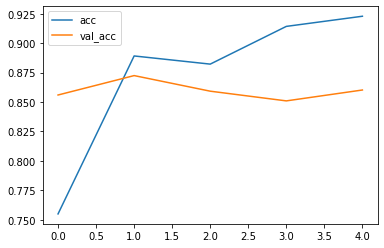

<Figure size 432x288 with 0 Axes>

In [63]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

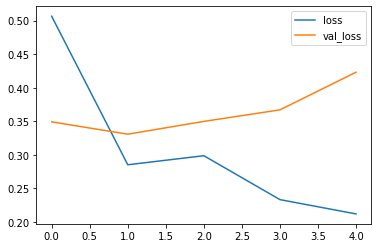

<Figure size 432x288 with 0 Axes>

In [64]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [69]:
#testing
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label: Bad sentiment
Predicted label: Good sentiment


In [70]:
test_sentence1 = "horrible."
predict_sentiment(test_sentence1)
test_sentence2 = "great!"
predict_sentiment(test_sentence2)

Predicted label: Good sentiment
Predicted label: Bad sentiment


In [67]:
test_sentence1 = "delicious"
predict_sentiment(test_sentence1)
test_sentence2 = "horrible!"
predict_sentiment(test_sentence2)

Predicted label: Bad sentiment
Predicted label: Good sentiment


In [105]:
test_sentence1 = "i sad it"
predict_sentiment(test_sentence1)
test_sentence2 = "worst!"
predict_sentiment(test_sentence2)

Predicted label: Bad sentiment
Predicted label: Good sentiment


In [115]:
negWords = []
n = open("negativeWords.txt", "r")
for line in n:
    negWords.append(line.strip())
negDf = pd.DataFrame(negWords)
negZeros = np.zeros(len(negWords))
negDf.insert(1,"sentiment",0)
df = df.rename(columns={'oldName1': 'newName1'})

AttributeError: 'DataFrame' object has no attribute 'labels'

In [104]:
posDict = []
n = open("positiveWords.txt", "r")
for line in n:
    posDict.append(line.strip())
print(posDict)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag